<img src="http://i.dailymail.co.uk/i/pix/2013/05/17/article-2325498-19D6CF64000005DC-862_634x415.jpg" style="float: top; margin: 20px; height: 500px">

## Predicting Pedestrian Area Type by Surrounding Businesses & Landmarks
_Sharleen Othman_

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz, DecisionTreeRegressor, DecisionTreeClassifier
import pydotplus
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV 
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from pandas.tools.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB


plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


Now that I know which areas are Commuter or Casual dominant, I want to find out if surrounding business types or landmarks are able to determine whether or not only a commuter or any casual city explorer would pass by the area.

In [2]:
wdf = pd.read_csv('./data_imgs/wdf_final.csv', index_col=0)
wdf

,sensor_description,hourly_counts,floor_sqm,block_norm,density,walkable,accident_count,base_property_id_House/Townhouse,base_property_id_Residential Apartments,base_property_id_Student Apartments,...,feature_name_Education Centre,feature_name_Leisure/Recreation,feature_name_Mixed Use,feature_name_Place Of Assembly,feature_name_Place of Worship,feature_name_Purpose Built,feature_name_Retail,feature_name_Transport,feature_name_Vacant Land,total_employment_in_block
block_id,,,,,,,,,,,,,,,,,,,,,
104,QV Market-Elizabeth St (West),462.5,165656.0,0.016407,28189.209718,0,8.0,0.0,12.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,281.0
1103,Victoria Point,99.0,766444.0,0.075911,1304.166679,0,0.0,0.0,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7727.0
1105,Southern Cross Station,150.0,603362.0,0.059758,2510.103553,0,3.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13881.0
1108,Webb Bridge,142.0,854485.0,0.084630,1677.885168,0,5.0,0.0,8.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,17788.0
1109,New Quay,194.5,491769.0,0.048706,3993.344625,0,9.0,19.0,8.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1450.0
1109,Waterfront City,57.5,491769.0,0.048706,1180.551753,0,9.0,19.0,8.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1450.0
113,QV Market-Peel St,114.0,74729.0,0.007401,15402.599205,0,70.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1077.0
15,Flinders St-Swanston St (West),2190.5,130787.0,0.012953,169105.219915,1,3.0,0.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2550.0
18,Flinders St-Spark La,154.5,195799.0,0.019392,7967.028090,0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4391.0


In [3]:
wdf.reset_index(inplace=True)
wdf.head()

,block_id,sensor_description,hourly_counts,floor_sqm,block_norm,density,walkable,accident_count,base_property_id_House/Townhouse,base_property_id_Residential Apartments,...,feature_name_Education Centre,feature_name_Leisure/Recreation,feature_name_Mixed Use,feature_name_Place Of Assembly,feature_name_Place of Worship,feature_name_Purpose Built,feature_name_Retail,feature_name_Transport,feature_name_Vacant Land,total_employment_in_block
0,104,QV Market-Elizabeth St (West),462.5,165656.0,0.016407,28189.209718,0,8.0,0.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,281.0
1,1103,Victoria Point,99.0,766444.0,0.075911,1304.166679,0,0.0,0.0,2.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7727.0
2,1105,Southern Cross Station,150.0,603362.0,0.059758,2510.103553,0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13881.0
3,1108,Webb Bridge,142.0,854485.0,0.084630,1677.885168,0,5.0,0.0,8.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,17788.0
4,1109,New Quay,194.5,491769.0,0.048706,3993.344625,0,9.0,19.0,8.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1450.0


In [4]:
wdf.columns

Index(['block_id', 'sensor_description', 'hourly_counts', 'floor_sqm',
       'block_norm', 'density', 'walkable', 'accident_count',
       'base_property_id_House/Townhouse',
       'base_property_id_Residential Apartments',
       'base_property_id_Student Apartments', 'base_property_id_Accommodation',
       'base_property_id_Amusement and Other Recreational Activities n.e.c.',
       'base_property_id_Bakery Product Manufacturing (Non-factory based)',
       'base_property_id_Cafes and Restaurants',
       'base_property_id_Catering Services',
       'base_property_id_Clubs (Hospitality)',
       'base_property_id_Confectionery Manufacturing',
       'base_property_id_Flower Retailing',
       'base_property_id_Health and Fitness Centres and Gymnasia Operation',
       'base_property_id_Internet Service Providers and Web Search Portals',
       'base_property_id_Newspaper and Book Retailing',
       'base_property_id_Non-Residential Property Operators',
       'base_property_id_Oth

In [5]:
#add my pedestrian area type labels to the dataframe
pcs = pd.read_csv('./data_imgs/pcs_for_clustering.csv')
pcs['Casual'] = pcs['PC2'].map(lambda x: 0 if x > 0.05 else 1)  #Casual-dominant areas are 1

pcs = pcs.loc[:,['Sensor_Name','Casual']]
pcs


,Sensor_Name,Casual
0,Alfred Place,1
1,Australia on Collins,1
2,Birrarung Marr,1
3,Bourke St-Russell St (West),1
4,Bourke Street Mall (North),1
5,Bourke Street Mall (South),1
6,Chinatown-Lt Bourke St (South),1
7,Chinatown-Swanston St (North),1
8,City Square,1
9,Collins Place (North),0


In [6]:
wdf = pd.merge(wdf, pcs, left_on='sensor_description', right_on='Sensor_Name',how='left')
wdf


,block_id,sensor_description,hourly_counts,floor_sqm,block_norm,density,walkable,accident_count,base_property_id_House/Townhouse,base_property_id_Residential Apartments,...,feature_name_Mixed Use,feature_name_Place Of Assembly,feature_name_Place of Worship,feature_name_Purpose Built,feature_name_Retail,feature_name_Transport,feature_name_Vacant Land,total_employment_in_block,Sensor_Name,Casual
0,104,QV Market-Elizabeth St (West),462.5,165656.0,0.016407,28189.209718,0,8.0,0.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,281.0,QV Market-Elizabeth St (West),1
1,1103,Victoria Point,99.0,766444.0,0.075911,1304.166679,0,0.0,0.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7727.0,Victoria Point,1
2,1105,Southern Cross Station,150.0,603362.0,0.059758,2510.103553,0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13881.0,Southern Cross Station,0
3,1108,Webb Bridge,142.0,854485.0,0.084630,1677.885168,0,5.0,0.0,8.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,17788.0,Webb Bridge,1
4,1109,New Quay,194.5,491769.0,0.048706,3993.344625,0,9.0,19.0,8.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1450.0,New Quay,1
5,1109,Waterfront City,57.5,491769.0,0.048706,1180.551753,0,9.0,19.0,8.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1450.0,Waterfront City,1
6,113,QV Market-Peel St,114.0,74729.0,0.007401,15402.599205,0,70.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1077.0,QV Market-Peel St,1
7,15,Flinders St-Swanston St (West),2190.5,130787.0,0.012953,169105.219915,1,3.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2550.0,Flinders St-Swanston St (West),1
8,18,Flinders St-Spark La,154.5,195799.0,0.019392,7967.028090,0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4391.0,Flinders St-Spark La,1
9,18,Flinders St-Spring St (West),123.0,195799.0,0.019392,6342.682557,0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4391.0,Flinders St-Spring St (West),1


In [7]:
#my predictors are going to be landmarks and businesses in the block area
predictors=[col for col in list(wdf) if col not in ['sensor_description','Sensor_Name','walkable','block_norm','cafe_rich','hourly_counts','block_id','floor_sqm','Casual', 'accident_count','density','total_employment_in_block']]

X = wdf[predictors]
y=wdf.Casual

#standardize
ss = StandardScaler()
Xs = ss.fit_transform(X)

In [8]:
# Before I proceed, I'm going to do a feature selection to reduce my dimensions and the noise.
lrcv_la = LogisticRegressionCV(penalty='l1', Cs=100, cv=10, solver='liblinear')
lrcv_la.fit(Xs, y)

# What are the best coefficients according to a model using gridsearch best lasso?
coeffs_la = pd.DataFrame(lrcv_la.coef_, columns=X.columns)
coeffsla_t = coeffs_la.transpose()
coeffsla_t.columns = ['lasso_coefs']
coeffsla_abs = coeffsla_t.abs().sort_values('lasso_coefs', ascending=False)
coeffsla_abs

#all my features are eliminated. this is a bad sign since lasso finds all my features not contributing to my model

/Users/sharleenies/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


,lasso_coefs
base_property_id_House/Townhouse,0.0
model_no_Seat,0.0
model_no_Barbeque,0.0
model_no_Bicycle Rails,0.0
model_no_Drinking Fountain,0.0
model_no_Floral Crate/Planter Box,0.0
model_no_Hoop,0.0
model_no_Information Pillar,0.0
model_no_Litter Bin,0.0
model_no_Picnic Setting,0.0


In [9]:
#With ridge, my coefficents won't be completely canceled out
lrcv_r = LogisticRegressionCV(penalty='l2', Cs=100, cv=10, solver='liblinear')
lrcv_r.fit(Xs, y)


# What are the best coefficients according to a model using gridsearch best lasso?
coeffs_r = pd.DataFrame(lrcv_r.coef_, columns=X.columns)
coeffsr_t = coeffs_r.transpose()
coeffsr_t.columns = ['ridge_coefs']
coeffsr_abs = coeffsr_t.abs().sort_values('ridge_coefs', ascending=False)
coeffsr_abs

/Users/sharleenies/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


,ridge_coefs
base_property_id_Amusement and Other Recreational Activities n.e.c.,0.331039
feature_name_Vacant Land,0.291542
feature_name_Transport,0.285088
feature_name_Place Of Assembly,0.276906
base_property_id_Student Apartments,0.263090
feature_name_Education Centre,0.251604
"base_property_id_Pubs, Taverns and Bars",0.205337
base_property_id_Clubs (Hospitality),0.170845
model_no_Information Pillar,0.170006
base_property_id_House/Townhouse,0.164301


In [10]:
#I'll take the first 10 features based on Ridge coeff
coeffsr_abs[:10].index

Index(['base_property_id_Amusement and Other Recreational Activities n.e.c.',
       'feature_name_Vacant Land', 'feature_name_Transport',
       'feature_name_Place Of Assembly', 'base_property_id_Student Apartments',
       'feature_name_Education Centre',
       'base_property_id_Pubs, Taverns and Bars',
       'base_property_id_Clubs (Hospitality)', 'model_no_Information Pillar',
       'base_property_id_House/Townhouse'],
      dtype='object')

In [11]:
# update my predictors
predictors_new=coeffsr_abs[:10].index

# again= [col for col in predictors if col not in med_ped]
X = wdf[predictors_new]
y=wdf.Casual
Xs = ss.fit_transform(X)

In [12]:
#split train and test set
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2) 

print ('baseline:', np.mean(y_test)) #baseline accuracy

baseline: 0.6666666666666666


In [13]:
#Determine which model to use

seed = 7
scoring = 'accuracy'

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=28, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
# We now have 6 models and accuracy estimations for each. We need to compare the models to each other and select the most accurate.
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=22, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    msg

LR: 0.750000 (0.433013)
LDA: 0.714286 (0.451754)
KNN: 0.750000 (0.433013)
CART: 0.821429 (0.382993)
NB: 0.571429 (0.476488)


/Users/sharleenies/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/sharleenies/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/sharleenies/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


SVM: 0.750000 (0.433013)


/Users/sharleenies/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/sharleenies/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/sharleenies/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


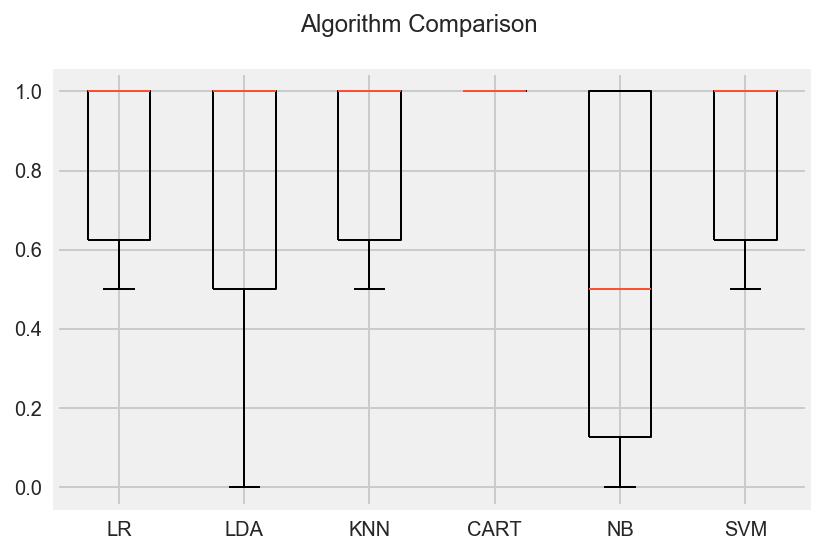

In [14]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#Decision tree might give me the best result out of all the models

In [15]:
# gridsearch kNN
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn_params = {
    'n_neighbors':np.arange(20)+1,
    'weights':['distance','uniform']
}

knn_gs = GridSearchCV(KNeighborsClassifier(), knn_params, cv=22, verbose=1)
knn_gs.fit(X_train, y_train)


/Users/sharleenies/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/sharleenies/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/sharleenies/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:552: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=22.
  % (m

Fitting 22 folds for each of 40 candidates, totalling 880 fits


[Parallel(n_jobs=1)]: Done 880 out of 880 | elapsed:    1.4s finished


GridSearchCV(cv=22, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]), 'weights': ['distance', 'uniform']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [16]:
knn_best = knn_gs.best_estimator_

predictions_knn = knn_best.predict(X_test)

print (knn_gs.best_params_)
print (knn_gs.best_score_)
print(accuracy_score(y_test, predictions_knn))
print(confusion_matrix(y_test, predictions_knn))
print(classification_report(y_test, predictions_knn))

#Precision score is very bad with KNN

{'n_neighbors': 1, 'weights': 'distance'}
0.875
0.666666666667
[[0 3]
 [0 6]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         3
          1       0.67      1.00      0.80         6

avg / total       0.44      0.67      0.53         9



/Users/sharleenies/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


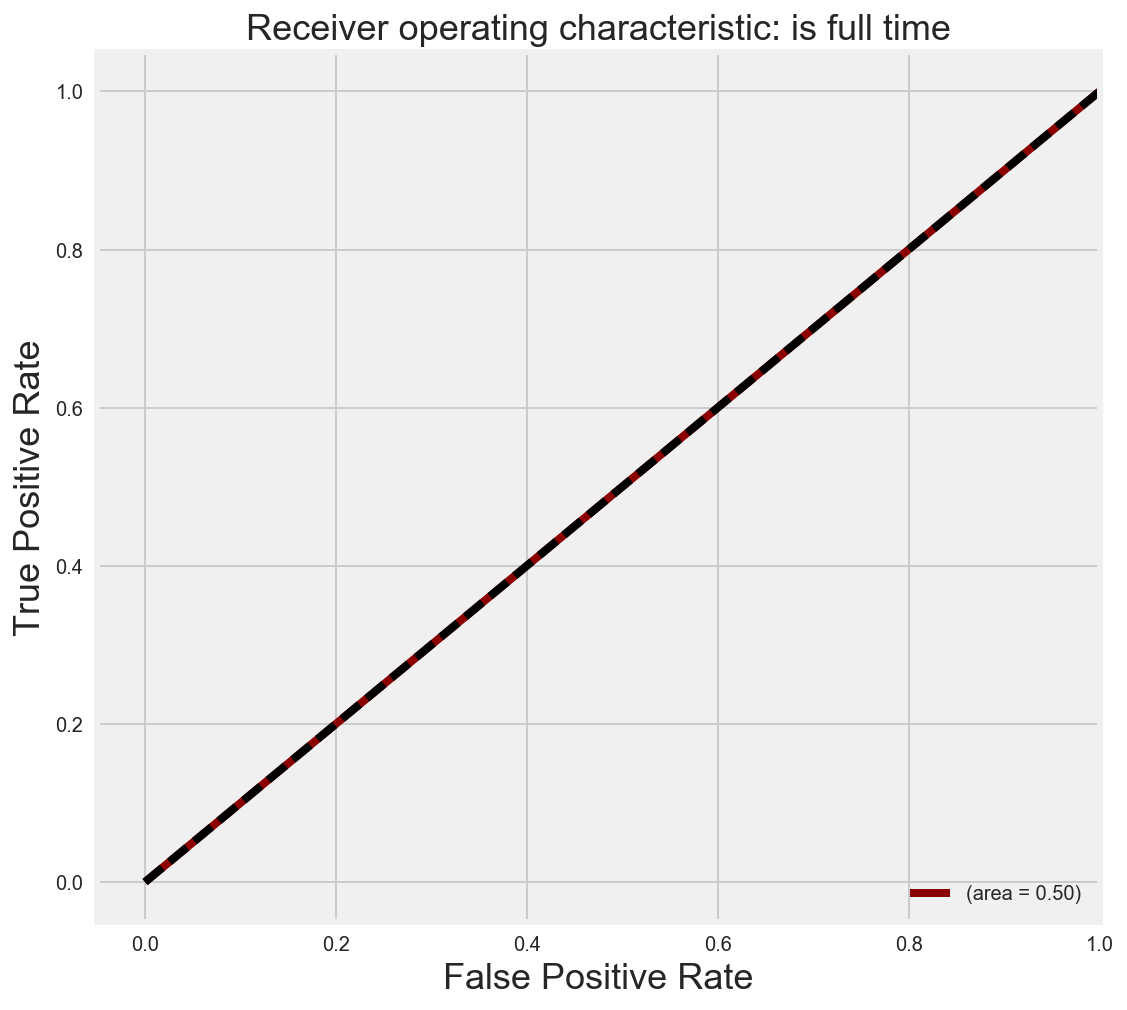

In [17]:
#Plot the ROC curve based on best parameters
from sklearn.metrics import roc_curve, auc
yhat = knn_best.predict(X_test)
yhat_pp = knn_best.predict_proba(X_test)

fpr, tpr, _ = roc_curve(y_test, yhat_pp[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[8,8])

plt.plot(fpr, tpr, label='(area = %0.2f)' % roc_auc, 
         linewidth=4, color='darkred')

plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic: is full time', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [18]:
# gridsearch SVM
from sklearn.svm import SVC

svc_params = {
    'C':np.logspace(-3, 2, 10),
    'gamma':np.logspace(-5, 2, 10),
    'kernel':['linear','rbf']
}

svc_gs = GridSearchCV(SVC(probability=True), svc_params, cv=22, verbose=1)
svc_gs.fit(X_train, y_train)


/Users/sharleenies/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:552: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=22.
  % (min_labels, self.n_folds)), Warning)


Fitting 22 folds for each of 200 candidates, totalling 4400 fits


[Parallel(n_jobs=1)]: Done 4400 out of 4400 | elapsed:    7.7s finished


GridSearchCV(cv=22, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-03,   3.59381e-03,   1.29155e-02,   4.64159e-02,
         1.66810e-01,   5.99484e-01,   2.15443e+00,   7.74264e+00,
         2.78256e+01,   1.00000e+02]), 'gamma': array([  1.00000e-05,   5.99484e-05,   3.59381e-04,   2.15443e-03,
         1.29155e-02,   7.74264e-02,   4.64159e-01,   2.78256e+00,
         1.66810e+01,   1.00000e+02]), 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [19]:
best_svc = svc_gs.best_estimator_

predictions_svc = best_svc.predict(X_test)

print (svc_gs.best_params_)
print (svc_gs.best_score_)
print(accuracy_score(y_test, predictions_svc))
print(confusion_matrix(y_test, predictions_svc))
print(classification_report(y_test, predictions_svc))

#SVC is also not doing well for my model

{'C': 7.7426368268112773, 'gamma': 0.077426368268112694, 'kernel': 'rbf'}
0.84375
0.666666666667
[[0 3]
 [0 6]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         3
          1       0.67      1.00      0.80         6

avg / total       0.44      0.67      0.53         9



/Users/sharleenies/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


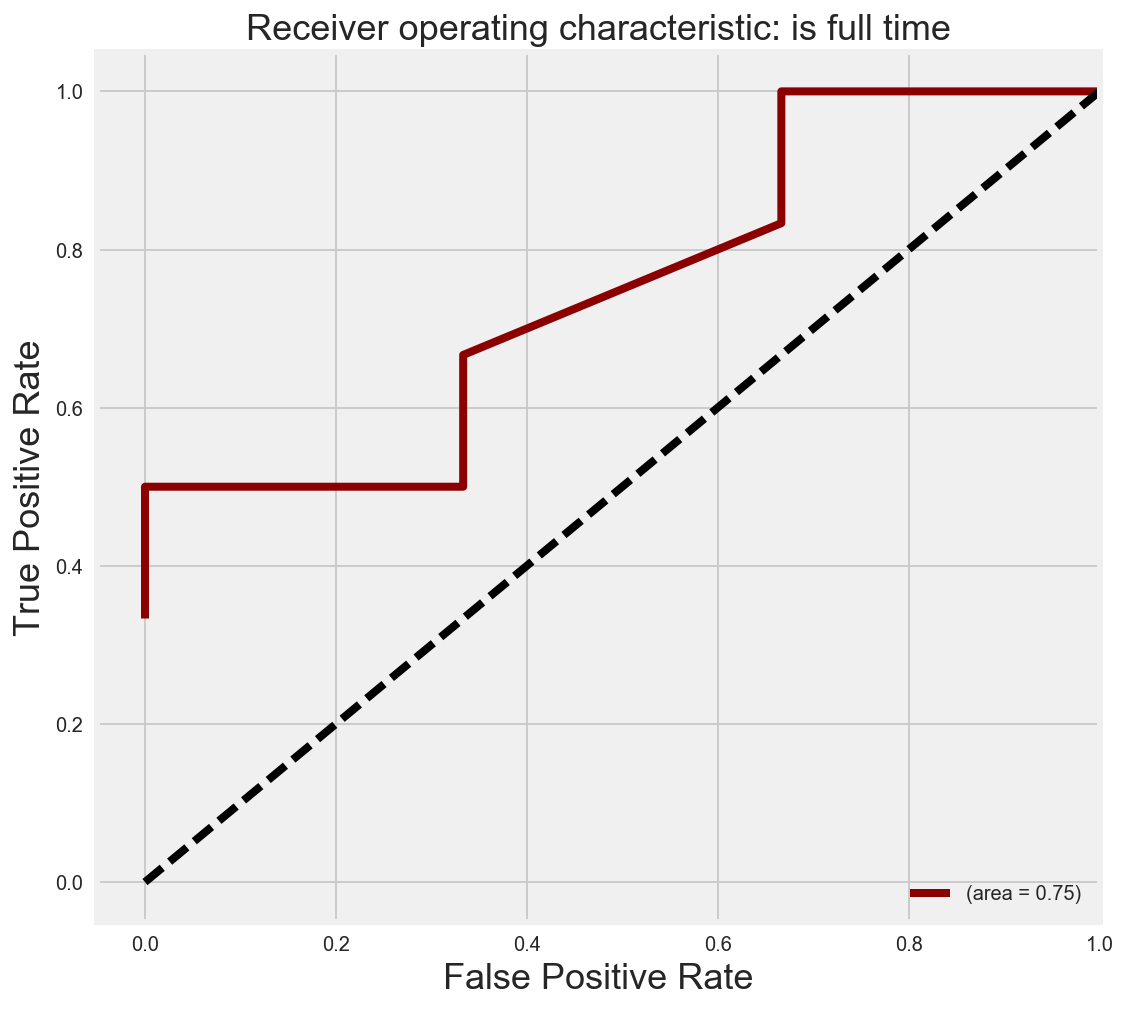

In [20]:
#Plot the ROC curve based on best parameters
from sklearn.metrics import roc_curve, auc
yhat = best_svc.predict(X_test)
yhat_pp = best_svc.predict_proba(X_test)

fpr, tpr, _ = roc_curve(y_test, yhat_pp[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[8,8])

plt.plot(fpr, tpr, label='(area = %0.2f)' % roc_auc, 
         linewidth=4, color='darkred')

plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic: is full time', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [ ]:
dtrN = DecisionTreeRegressor(max_depth=None)
dtrN.fit(X_train, y_train)

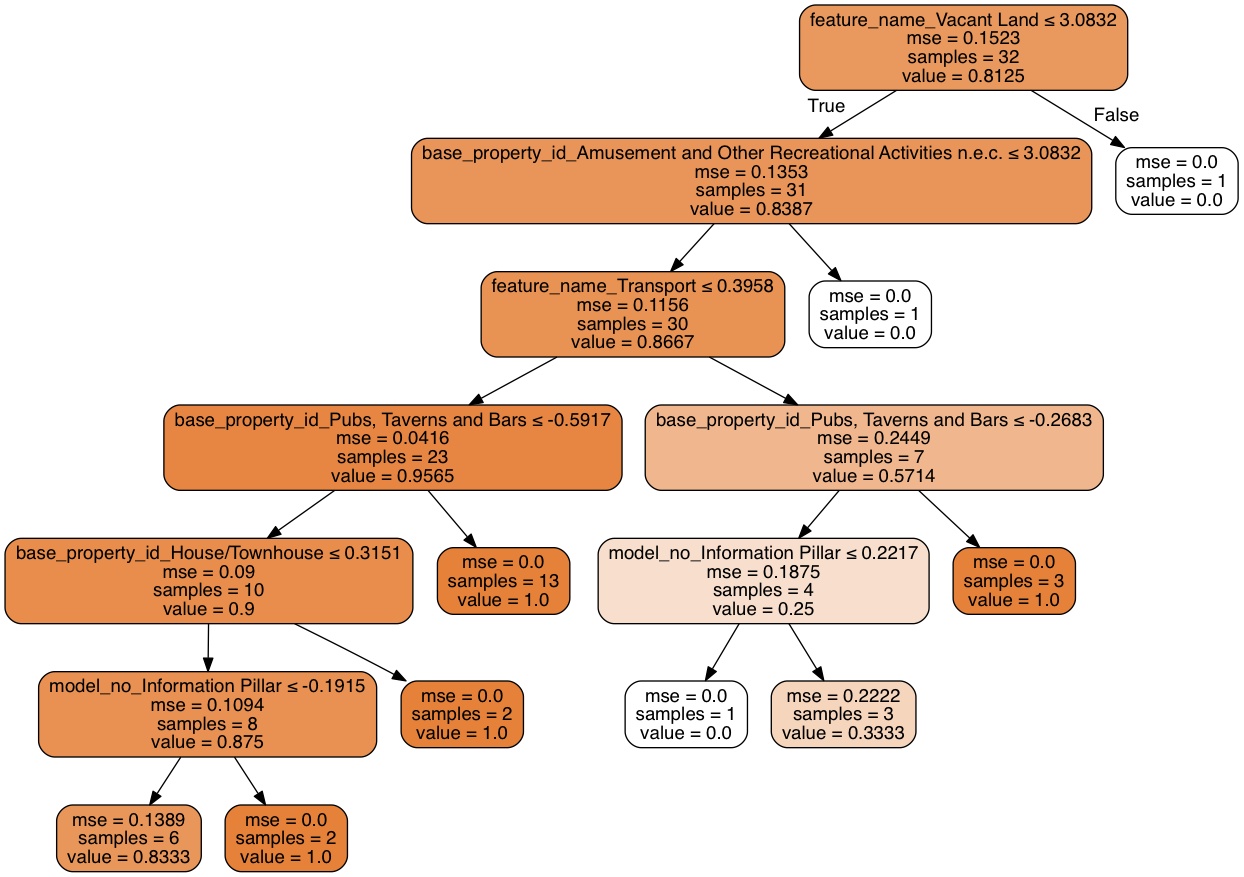

In [42]:
dot_data = StringIO()  

export_graphviz(dtrN, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [43]:
dtc_params = {
    'max_depth':[None,1,2,3,4],
    'max_features':[None,'log2','sqrt',2,3,4,5],
    'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50]
}

from sklearn.model_selection import GridSearchCV

dtc_gs = GridSearchCV(DecisionTreeClassifier(), dtc_params, cv=22, verbose=1)

In [44]:
dtc_gs.fit(X_train, y_train)

Fitting 22 folds for each of 385 candidates, totalling 8470 fits


/Users/sharleenies/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=22.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Done 8470 out of 8470 | elapsed:   15.0s finished


GridSearchCV(cv=22, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [None, 1, 2, 3, 4], 'max_features': [None, 'log2', 'sqrt', 2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [45]:
dtc_best = dtc_gs.best_estimator_

predictions_dtc = dtc_best.predict(X_test)

print (dtc_gs.best_params_)
print (dtc_gs.best_score_)
print(accuracy_score(y_test, predictions_dtc))
print(confusion_matrix(y_test, predictions_dtc))
print(classification_report(y_test, predictions_dtc))

{'max_depth': None, 'max_features': None, 'min_samples_split': 3}
0.875
0.666666666667
[[0 3]
 [0 6]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         3
          1       0.67      1.00      0.80         6

avg / total       0.44      0.67      0.53         9



/Users/sharleenies/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


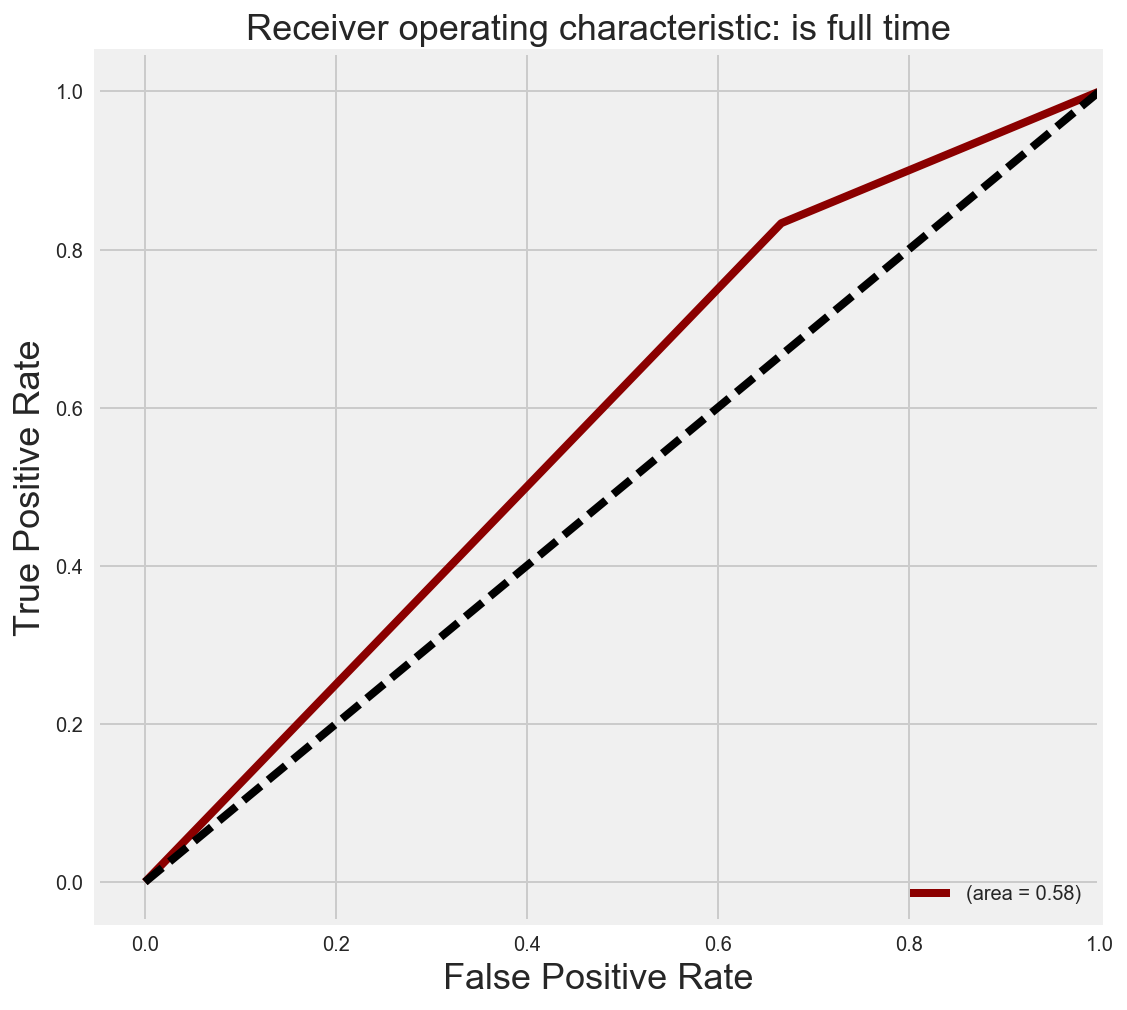

In [46]:
#Plot the ROC curve based on best parameters
from sklearn.metrics import roc_curve, auc
yhat = dtc_best.predict(X_test)
yhat_pp = dtc_best.predict_proba(X_test)

fpr, tpr, _ = roc_curve(y_test, yhat_pp[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[8,8])

plt.plot(fpr, tpr, label='(area = %0.2f)' % roc_auc, 
         linewidth=4, color='darkred')

plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic: is full time', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [47]:
fi = pd.DataFrame({
        'feature':X.columns,
        'importance':dtc_best.feature_importances_
    })

fi.sort_values('importance', ascending=False, inplace=True)
fi

,feature,importance
6,"base_property_id_Pubs, Taverns and Bars",0.302461
2,feature_name_Transport,0.235810
0,base_property_id_Amusement and Other Recreatio...,0.215372
1,feature_name_Vacant Land,0.201912
8,model_no_Information Pillar,0.032099
9,base_property_id_House/Townhouse,0.012346
3,feature_name_Place Of Assembly,0.000000
4,base_property_id_Student Apartments,0.000000
5,feature_name_Education Centre,0.000000
7,base_property_id_Clubs (Hospitality),0.000000


In [34]:
# All my models have yielded bad scores and precision. 
# It is likely that none of the features I have used have any major impact on commuter or casual pedestrians decisions
#nonetheless, in the area concerned, there is indication that Pubs and bars, Transport routes are more likely to attract casual pedsetrians to the area.